上次跟大家講的碗稞，跑出來大概是這樣。

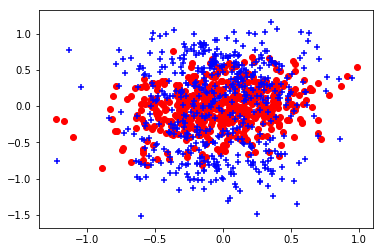

epoch 0000  accuracy=0.47999999


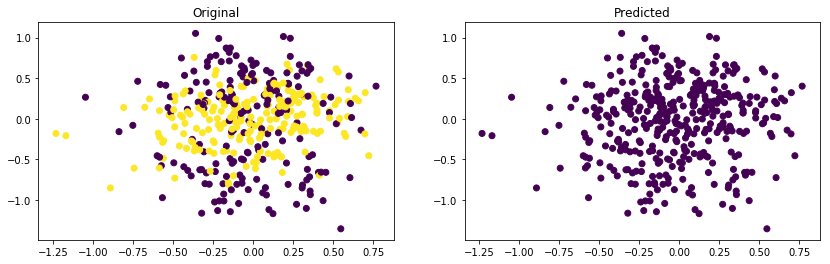

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sklearn as sk
from sklearn import model_selection as skms
from sklearn import datasets as skds

data1 = np.loadtxt('D:\Python\pos_EN_without_multipath.csv',delimiter=',')
data2 = np.loadtxt('D:\Python\pos_EN_with_multipath.csv',delimiter=',')

plt.scatter(data1[:,0],data1[:,1],color='red',marker='o')
plt.scatter(data2[:,0],data2[:,1],color='blue',marker='+')

plt.show()

#data = pd.read_csv('D:\Python\pos_EN_without_multipath.csv',delimiter=',')

#test=100+np.round(100*data1[:,1].reshape(-1,1))
#test=test.astype(int)
#test=test.transpose()

#test=np.eye(500)[test]
#print(test)

y1=np.ones(500)
y2=np.zeros(500)
y=np.concatenate((y1, y2), axis=0)
y=y.astype(int)
y=np.eye(1000)[y]
X=np.concatenate((data1,data2),axis=0)

X_train, X_test, y_train, y_test = skms.train_test_split(
    X, y, test_size=.4, random_state=42)

num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

learning_rate = 0.0001

# input images
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x")
# output labels
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y")

# model paramteres
w = tf.Variable(tf.zeros([num_inputs, num_outputs]), name="w")
b = tf.Variable(tf.zeros([num_outputs]), name="b")
model = tf.nn.sigmoid(tf.matmul(x, w) + b)

loss = tf.reduce_mean(-tf.reduce_sum(
    (y * tf.log(model)) + ((1 - y) * tf.log(1 - model)), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(loss)

num_epochs = 1
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        tfs.run(optimizer, feed_dict={x: X_train, y: y_train})
        y_pred = tfs.run(tf.argmax(model, 1), feed_dict={x: X_test})
        y_orig = tfs.run(tf.argmax(y, 1), feed_dict={y: y_test})

        preds_check = tf.equal(y_pred, y_orig)
        accuracy_op = tf.reduce_mean(tf.cast(preds_check, tf.float32))
        accuracy_score = tfs.run(accuracy_op)
        print("epoch {0:04d}  accuracy={1:.8f}".format(
            epoch, accuracy_score))

        
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_orig)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred)
plt.title('Predicted')
plt.show()

#y = tf.convert_to_tensor(data1[:,1], dtype=tf.float32)
#x=tf.convert_to_tensor(data1[:,0], dtype=tf.float32)

#m=tf.Variable(0.)
#b=tf.Variable(0.)

#Compute model and lossqqqqqqqqqqqqqqqqqqq
#model=tf.nn.sigmoid(tf.add(tf.multiply(x,m),b))
#loss=-1.*tf.reduce_sum(y*tf.log(model)+(1.-y)*(1.-tf.log(model)))

#Create optimizer
#learn_rate=0.005
#num_epochs=500
#optimizer=tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

#Initialize variables
#init = tf.global_variables_initializer()

#Launch session
#with tf.Session() as sess:
#    sess.run(init)

    #Run optimizer
#    for epoch in range(num_epochs):
#        sess.run(optimizer)
#
    #Displayresults
#    print('m=',sess.run(m))
#    print('b=',sess.run(b))
